# Linear Regression

This is a Python version folk of the programming exercise 1 of the "Machine Learning" MOOC on Coursera, given by *Andrew Ng*.

In this notebook, we illustrate that how to perform a typical **regression task** with the well-known algorithm called the linear regression. To be specific, the linear model we'll use here is the **ordinary least squares** regression model.

For a learning purpose, we have also added some detailed notes (with as less math as possible) to help your understand the algorithm.

In [1]:
import warnings
import numpy as np
import seaborn as sns # seaborn will beautify our plots from matplotlib
from helper import display_data # 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
sns.set_context('notebook')
sns.set_style('dark')
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Load Data

Before we start, let's have a look on the dataset.

In [2]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
display_data(data)

array([[  6.1101,  17.592 ],
       [  5.5277,   9.1302],
       [  8.5186,  13.662 ],
       [  7.0032,  11.854 ],
       [  5.8598,   6.8233]])

In [3]:
# Extract features and labels to X and y, respectively
X, y = data[:,0], data[:,1]
display_data(X), display_data(y)

(array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598]),
 array([ 17.592 ,   9.1302,  13.662 ,  11.854 ,   6.8233]))

We will transform our data to another shape later for the ease of implementation. But in order to make it available to the matplotlib's plot functions, we use the format as shown above at this moment.

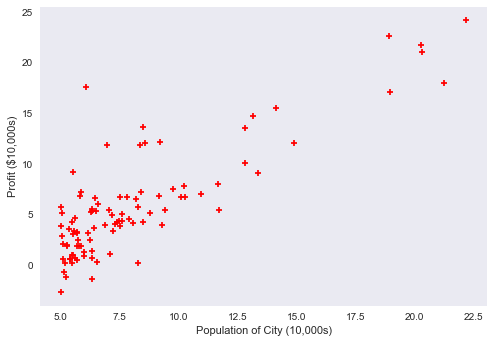

In [4]:
plt.scatter(X, y, s=30, c='r', marker='+', linewidths=1)
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')

## Cost and Gradient Descent

Let $x^{(i)}$ means the i-th data point in our training set, the cost function is given by:

$$J(\theta) = \frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

where 

$$h_{\theta}(x^{(i)}) = \sum_{k=0}^{n}\theta_{k}x_{k}^{(i)}$$

This formula names our model to the **ordinary least squares** regression model, **OLS** in short. Note that the reason we add a $\frac{1}{2}$ at the beginning is to simplify the derivate of $J(\theta)$ (you will see it in the **[Appendix A](#Appendix-A)**).

Our final purpose is to find a "best" $\theta$ that can minimize the cost function.

In [5]:
def compute_cost(X, y, theta):
    m = y.size
    h = X.dot(theta)
    # J = (1 / (2 * m)) * np.sum(np.square(h - y))
    J = np.sum(np.square(h - y)) / (2 * m)
    return J

In [6]:
# Kinda reshape the data format
X = np.c_[np.ones((X.shape[0], 1)), X]
y = np.c_[y]

In [7]:
display_data(X)

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598]])

In [8]:
display_data(y)

array([[ 17.592 ],
       [  9.1302],
       [ 13.662 ],
       [ 11.854 ],
       [  6.8233]])

In [9]:
# Compute and display initial cost, expect result to be around 32.07
compute_cost(X, y, [[0], [0]])

32.072733877455676

In [10]:
# Further testing of the cost function, expect result to be around 54.24
compute_cost(X, y, [[-1], [2]])

54.242455082012377

The gradient descent algorithm we used here is called the **Batch Gradient Descent (BGD)**, we will keep updating $\theta_{j}$ by formula

$$\theta_{j} := \theta_{j} - \alpha\frac{\partial}{\partial \theta_{j}}J(\theta)$$

It's easy to find the partial derivative of the right hand side (see the end of the notebook for detail). The final algorithm is 

$For$ $every$ $j$, $repeat$ $until$ $convergence$ {

$$\theta_{j} := \theta_{j} + \alpha\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)}))x_{j}^{(i)}$$

}

Note that the sign before $\alpha$ are **different** in the two formula above.

In [11]:
def gradient_descent(X, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        h = X.dot(theta)
        theta = theta + alpha * (1 / m) * (X.T.dot(y - h))
        # You may meet some gradient descent implementation 
        # use the formula below, which is also correct
        # theta = theta - alpha * (1 / m) * (X.T.dot(h - y))
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

In [12]:
# Initialize the theta
theta = np.c_[np.zeros((X.shape[1], 1))] # array[[0], [0]] for our dataset

# theta for minimized cost J
theta, J_history = gradient_descent(X, y, theta)
print('theta:', theta.ravel())

theta: [-3.63029144  1.16636235]


The $\theta$ we obtained above is $\theta = \begin{bmatrix}-3.6302 \\1.1663 \end{bmatrix}$, and we have $X = \begin{bmatrix}x_{0} \\x_{1} \end{bmatrix}$, where $x_{0}$ is set to be 1.

The linear function then becomes:

$$\hat{y} = \theta^{T}X = -3.6302 + 1.1663x_1$$

We can examine that we converge to a $\theta$ that minimizes $J(\theta)$.

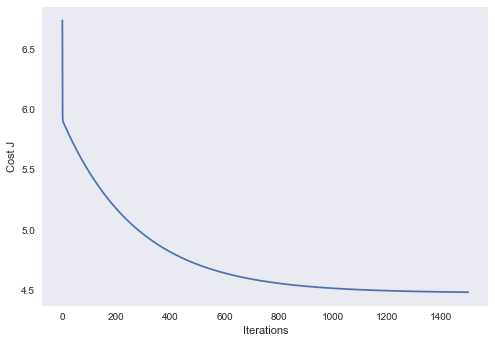

In [13]:
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

## Apply the Linear Regression Model

As we mentioned above, the linear function we obtained is

$$\hat{y} = \theta^{T}X = -3.6302 + 1.1663x_1$$

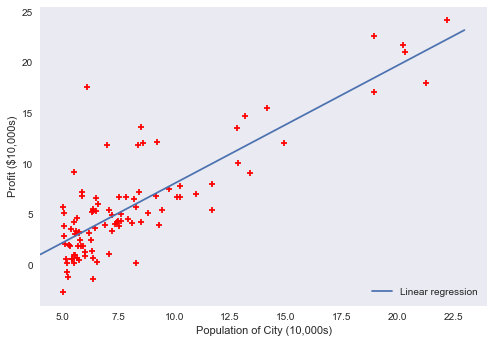

In [14]:
lr_X = np.arange(4, 24)
# If you want a vectorized implementation then you need to add a column of 1 for lr_X
lr_y = theta[0] + theta[1] * lr_X

plt.scatter(X[:,1], y, s=30, c='r', marker='+', linewidths=2)
plt.plot(lr_X, lr_y, label='Linear regression')

plt.xlim(4,24)
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')
plt.legend(loc=4);

In [15]:
print('For population = 35,000, we predict a profit of', theta.T.dot([1, 3.5]) * 10000)

For population = 35,000, we predict a profit of [ 4519.7678677]


In [16]:
print('For population = 70,000, we predict a profit of', theta.T.dot([1, 7]) * 10000)

For population = 70,000, we predict a profit of [ 45342.45012945]


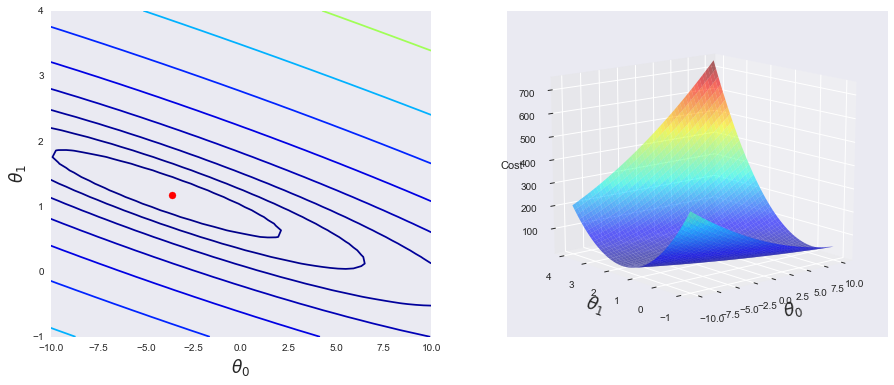

In [17]:
# Taken from JWarmenhoven's work on GitHub with minor modifications

# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = compute_cost(X, y, theta=[[xx[i, j]], [yy[i, j]]])

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0], theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

## Reference
- [CS229 Lecture Note - Supervised Learning, Discriminative Algorithms](http://cs229.stanford.edu/notes/cs229-notes1.pdf)
- [JWarmenhoven's work on GitHub](https://github.com/JWarmenhoven/Coursera-Machine-Learning/blob/master/notebooks/Programming%20Exercise%201%20-%20Linear%20Regression.ipynb)

## Appendix A

Here we will show you how to find partial derivative of $J(\theta)$ where we only have 1 training data, which means $m = 1$. Then we can get rid of the summation for simplicity.

$\frac{\partial}{\partial \theta_{j}}J(\theta)$

$= \frac{\partial}{\partial \theta_{j}}\frac{1}{2}(h_{\theta}(x) - y)^{2}$

$= (h_{\theta}(x) - y)\frac{\partial}{\partial \theta_{j}}(h_{\theta}(x) - y)$ (and you see the $\frac{1}{2}$ cancelled out)

$= (h_{\theta}(x) - y)\frac{\partial}{\partial \theta_{j}}(\sum_{i=0}^{n}\theta_{i}x_{i} - y)$

$= (h_{\theta}(x) - y)x_{j}$

Adopting to the $m > 1$ case,

$\frac{\partial}{\partial \theta_{j}}J(\theta) = (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$
